<a href="https://colab.research.google.com/github/servetgulnaroglu/Forecasting/blob/task1/notebooks/n1-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting current value of a football player

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_data.csv')

In [6]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [7]:
dfTips.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Fit a Regression Model to Predict Tip

In [8]:
# Assign independent(Y) and dependent(X) variables
X = df[['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
        'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
        'minutes played', 'days_injured', 'games_injured', 'award',
        'highest_value', 'position_encoded', 'winger']]
Y = df[['current_value']]

In [9]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Displaying the regression model parameters
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [5247419.3892688]
Coefficients: 
 [[ 9.89314087e+02 -2.17861486e+05 -5.13428517e+04  7.88280676e+05
   1.14351893e+06  7.25782768e+04 -6.68146303e+04 -1.80851641e+05
  -2.86983947e+05  3.15391607e+04  1.16513387e+03  4.20483178e+03
  -4.93139021e+04 -3.33018992e+05  6.05783517e-01 -3.17578086e+04
  -5.73633282e+04]]


In [10]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [5247419.3892688]
Coefficients: 
 [[ 9.89314087e+02 -2.17861486e+05 -5.13428517e+04  7.88280676e+05
   1.14351893e+06  7.25782768e+04 -6.68146303e+04 -1.80851641e+05
  -2.86983947e+05  3.15391607e+04  1.16513387e+03  4.20483178e+03
  -4.93139021e+04 -3.33018992e+05  6.05783517e-01 -3.17578086e+04
  -5.73633282e+04]]


In [11]:
# Generate new prediction - aka run scoring model
new_player_features = np.array([189, 32, 104, 0, 0, 0.009584665, 0, 0,
                                1.217252396, 0.335463259, 9390, 42, 5,
                                13, 70000000, 1, 0]).reshape(1, -1)

# Predicting the current value
predicted_value = regr.predict(new_player_features)
print('Predicted Current Value: \n', predicted_value)

Predicted Current Value: 
 [[41699601.55499863]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


utexas_ds_orie_divider_gray.png

## Explore Data

### Option 1: EDA in Python

#### Distribution of Current Value of Football Players


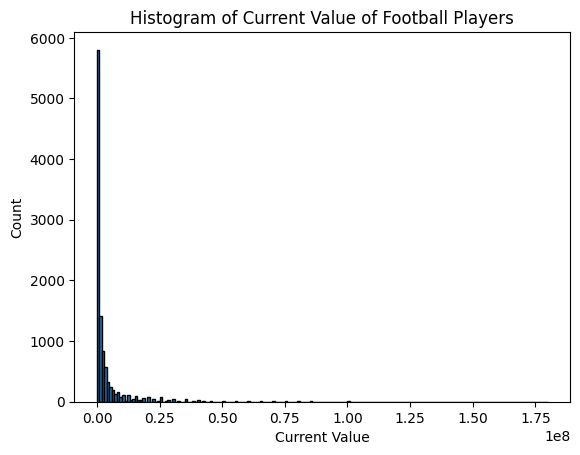

In [12]:
# Set data fields for current value
y = df.loc[:, 'current_value']

# Set histogram parameters
binwidth = 1_000_000
binrange = np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange, edgecolor='black')
plt.xlabel('Current Value')
plt.ylabel('Count')
plt.title('Histogram of Current Value of Football Players')
plt.show()

#### Histogram of Current Value of Football Players

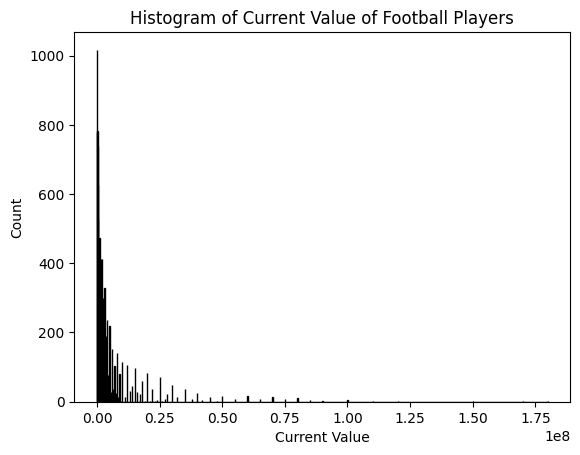

In [17]:
# Set data fields
y = df.loc[:, 'current_value']

# Set histogram parameters
binwidth = 100_000
binrange = np.arange(min(y), max(y) + binwidth, binwidth)


# Show plot
plt.hist(y, bins=binrange, edgecolor='black')
plt.xlabel('Current Value')
plt.ylabel('Count')
plt.title('Histogram of Current Value of Football Players')
plt.show()

An interesting phenomenon is visible: peaks occur at the whole-dollar and half-dollar amounts, which is caused by customers picking round numbers as tips. This behavior is common to other types of purchases too, like gasoline.

#### Scatterplot of highest value and current value

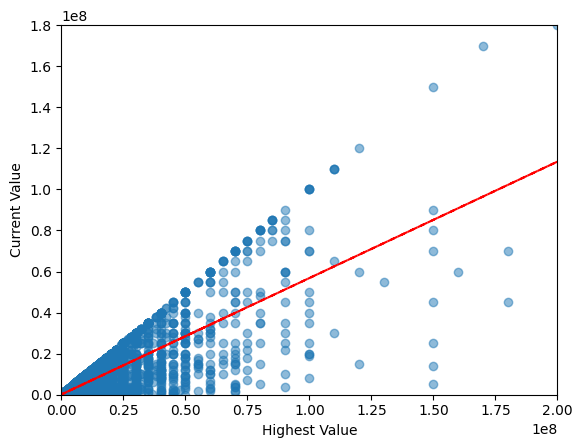

In [15]:
# Set data fields
x = df.loc[:, 'highest_value']
y = df.loc[:, 'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y, alpha=0.5)
plt.plot(x, p(x), "r--")
plt.xlim(0, np.max(df.loc[:, 'highest_value']))
plt.ylim(0, np.max(df.loc[:, 'current_value']))
plt.xlabel('Highest Value')
plt.ylabel('Current Value')
plt.show()


Points below the line correspond to tips that are lower than expected (for that bill amount), and points above the line are higher than expected. We might expect to see a tight, positive linear association, but instead see variation that increases with tip amount. In particular, there are more points far away from the line in the lower right than in the upper left, indicating that more customers are very cheap than very generous.

#### Scatterplot of Current Value vs. Highest Value by Position and Age Group

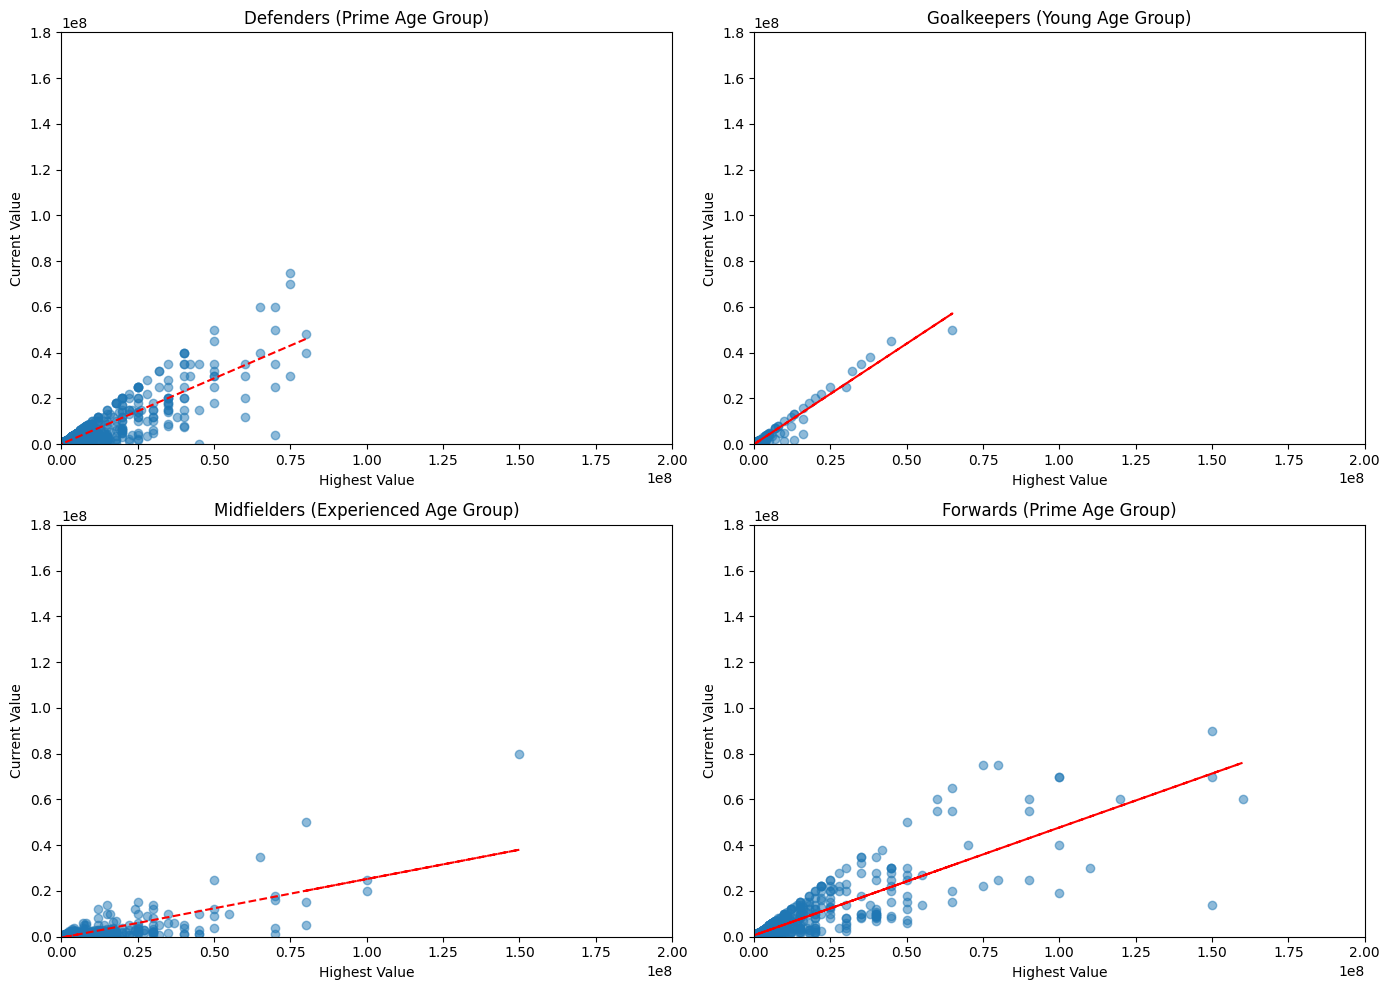

In [18]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Define categories
def categorize_age(age):
    if age <= 25:
        return 'Young'
    elif age <= 30:
        return 'Prime'
    else:
        return 'Experienced'

df['age_group'] = df['age'].apply(categorize_age)

# Top left plot: Defenders (Prime age group)
x = df.loc[(df['position_encoded'] == 2) & (df['age_group'] == 'Prime'), 'highest_value']
y = df.loc[(df['position_encoded'] == 2) & (df['age_group'] == 'Prime'), 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x, y, alpha=0.5)
axs[0, 0].plot(x, p(x), "r--")
axs[0, 0].set_xlim(0, np.max(df['highest_value']))
axs[0, 0].set_ylim(0, np.max(df['current_value']))
axs[0, 0].set_xlabel('Highest Value')
axs[0, 0].set_ylabel('Current Value')
axs[0, 0].set_title('Defenders (Prime Age Group)')

# Top right plot: Goalkeepers (Young age group)
x = df.loc[(df['position_encoded'] == 1) & (df['age_group'] == 'Young'), 'highest_value']
y = df.loc[(df['position_encoded'] == 1) & (df['age_group'] == 'Young'), 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x, y, alpha=0.5)
axs[0, 1].plot(x, p(x), "r--")
axs[0, 1].set_xlim(0, np.max(df['highest_value']))
axs[0, 1].set_ylim(0, np.max(df['current_value']))
axs[0, 1].set_xlabel('Highest Value')
axs[0, 1].set_ylabel('Current Value')
axs[0, 1].set_title('Goalkeepers (Young Age Group)')

# Bottom left plot: Midfielders (Experienced age group)
x = df.loc[(df['position_encoded'] == 3) & (df['age_group'] == 'Experienced'), 'highest_value']
y = df.loc[(df['position_encoded'] == 3) & (df['age_group'] == 'Experienced'), 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x, y, alpha=0.5)
axs[1, 0].plot(x, p(x), "r--")
axs[1, 0].set_xlim(0, np.max(df['highest_value']))
axs[1, 0].set_ylim(0, np.max(df['current_value']))
axs[1, 0].set_xlabel('Highest Value')
axs[1, 0].set_ylabel('Current Value')
axs[1, 0].set_title('Midfielders (Experienced Age Group)')

# Bottom right plot: Forwards (Prime age group)
x = df.loc[(df['position_encoded'] == 4) & (df['age_group'] == 'Prime'), 'highest_value']
y = df.loc[(df['position_encoded'] == 4) & (df['age_group'] == 'Prime'), 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x, y, alpha=0.5)
axs[1, 1].plot(x, p(x), "r--")
axs[1, 1].set_xlim(0, np.max(df['highest_value']))
axs[1, 1].set_ylim(0, np.max(df['current_value']))
axs[1, 1].set_xlabel('Highest Value')
axs[1, 1].set_ylabel('Current Value')
axs[1, 1].set_title('Forwards (Prime Age Group)')

# Adjust layout
plt.tight_layout()
plt.show()


## Takeaways

What is learned from the plots is different from what is illustrated by the regression model, even though the experiment was not designed to investigate any of these other trends. The patterns found by exploring the data suggest hypotheses about tipping that may not have been anticipated in advance, and which could lead to interesting follow-up experiments where the hypotheses are formally stated and tested by collecting new data.

utexas_ds_orie_divider_gray.png